(dft)=
# Diskrete Fourier-Transformation verstehen

## Lernziele für den Abschnitt *Diskrete Fourier-Transformation verstehen*

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für den Abschnitt:</b></div>
    <ul>
        <li> Eigenschaften der diskreten Fourier-Transformation verstehen </li>
        <li> mithilfe von Grundbegriffen und Berechnungen </li>
        <li> um die Auswirkung auf Messergebnisse im Frequenzbereich zu bewerten </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import schemdraw
import schemdraw.elements as elm
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import locale
import distutils.spawn
from distutils.spawn import find_executable
import IPython.display
from IPython.display import display, Latex, IFrame

print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('scipy', scipy.__version__)
print('pandas', pd.__version__)
print('locale', locale)
print('distutils.spawn', distutils.spawn)
print('IPython.display', IPython.display)
print('schemdraw', schemdraw.__version__)

matplotlib 3.7.1
numpy 1.24.2
scipy 1.10.1
pandas 1.5.3
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/locale.py'>
distutils.spawn <module 'distutils.spawn' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/setuptools/_distutils/spawn.py'>
IPython.display <module 'IPython.display' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/IPython/display.py'>
schemdraw 0.15


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Grundlagen der diskreten Fourier-Transformation (DFT)

<a title="Amédée Félix Barthélemy Geille
, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Joseph_Fourier.jpg"><img width="256" alt="Joseph Fourier" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Joseph_Fourier.jpg/256px-Joseph_Fourier.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Joseph_Fourier.jpg">Amédée Félix Barthélemy Geille</a>, Public domain, via Wikimedia Commons

Jean Baptiste Joseph Fourier erkannte 1807 die Bedeutung der harmonischen Analyse am Beispiel des Wärmeleitungsproblems. Heute wird die harmonische Analyse in vielen Anwendungsgebieten mit ihrer Signaldarstellung im Frequenzbereich genutzt. {cite:p}`werner_digitale_2019`

Die DFT liefert eine eineindeutige Abbildung zwischen der Zeitfolge $x[n]$ und ihrem Spektrum $X[k]$.

Die DFT steht in engem Zusammenhang mit der Fourier-Reihe und der Fourier-Transformation.

Die DFT kann mit der schnellen Fourier-Transformation (FFT) effizient berechnet werden.

Zur Erinnerung: **Fourieranalyse** und Fourierreihen bei **zeitkontinuierlichen, periodischen Funktionen**: Man erhält im Frequenzbereich ein Linienspektrum mit den Fourierkoeffizienten $c_k$ bei den Frequenzen $k\cdot f_0$ mit der Grundfrequenz $f_0 = 1/T_0$ und der Periode $T_0$ des Zeitsignals.

\begin{equation}
x(t)=\sum_{k=-\infty}^{+\infty} c_k \cdot e^{j\cdot 2\pi \cdot f_0\cdot k\cdot t}
\end{equation}

\begin{equation}
c_k = \frac{1}{T_0}\cdot\int_{t_0}^{t_0+T_0} x(t)\cdot e^{-j\cdot 2\pi \cdot f_0 \cdot k \cdot t} dt
\end{equation}

## Diskrete Fourier-Analyse (DFT)

Für **zeitdiskrete, periodische** Funktionen

Man erhält ein Linienspektrum mit den DFT-Koeffizienten $X[k]$ mit der Periode $N$ zu den normierten Frequenzen $k/N$, $k=0..N-1$, mit der normierten Grundfrequenz $1/N$ und der Periode $N$ des Zeitsignals.

Die DFT und ihre Inverse (IDFT) sind bis auf den Skalierungsfaktor $1/N$ symmetrisch

\begin{equation}
x[n] = \frac{1}{N}\cdot\sum_{k=0}^{N-1} X[k]\cdot e^{j\cdot 2\pi \frac{k\cdot n}{N}}
\end{equation}

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n]\cdot e^{-j\cdot 2\pi \cdot \frac{k\cdot n}{N}}
\end{equation}

\begin{equation}
x [n] \overset{\text{DFT}}{\leftrightarrow} X[k]
\end{equation}

Wegen der Periodizität der Exponentialfunktion $\exp(-j\cdot 2k/N)$ ordnet die DFT den $N$ Elementen einer Periode der Folge genau $N$ Spektrallinien für $k = 0,1,...,N-1$ zu

Die DFT ist eine Blocktransformation, die $N$ Signalelementen im Zeitbereich genau $N$ Signalelemente im Frequenzbereich und umgekehrt bijektiv zuordnet.

Da jede Folge endlicher Länge $L$ mit der Periode $N\geq L$ eindeutig periodisch fortgesetzt werden kann, ist die DFT auf alle geordneten Zahlenfolgen endlicher Länge anwendbar $\to$ Messdaten ...

![periode](../img/dft-period.png)

## Definition DFT-Paar

\begin{equation}
x[n] \overset{\text{DFT}}{\leftrightarrow} X[k]
\end{equation}

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n] \cdot w_N^{k\cdot n}\text{ für }k=0,1,2,...,N-1\text{ mit dem komplexen Faktor }w_N = e^{-j\cdot 2\pi /N}
\end{equation}

\begin{equation}
x[n] = \frac{1}{N}\cdot\sum_{k=0}^{N-1} X[k]\cdot w_N^{-k\cdot n}
\end{equation}

\begin{equation}
x[n] = \frac{1}{N}\cdot \sum_{k=0}^{N-1} X[k] \cdot \left[\cos\left(\frac{2\pi}{N}\cdot k \cdot n\right) + j\cdot \sin\left(\frac{2\pi}{N}\cdot k \cdot n\right)\right]
\end{equation}

## Grundlegende DFT-Paare

\begin{equation}
x[n] = \delta[n]\text{ für }0\leq n\leq N-1 \overset{\text{DFT}}{\leftrightarrow} X[k] = 1\text{ für } 0\leq k\leq N-1
\end{equation}

\begin{equation}
x[n]=1\text{ für }0\leq n\leq N-1 \overset{\text{DFT}}{\leftrightarrow} X[k]=N\cdot\delta[k] \text{ für }0\leq k\leq N-1
\end{equation}

\begin{equation}
x[n] = w_N^{-n \cdot k_0}\text{ für }\overset{\text{DFT}}{\leftrightarrow} X[k] = N\cdot \delta[k-k_0]\text{ für }0\leq k\leq N-1
\end{equation}

\begin{equation}
x[n] = \cos(2\pi\cdot k_0 \cdot n/N)\text{ für }0\leq n\leq N-1 \overset{\text{DFT}}{\leftrightarrow} X[k] = \frac{N}{2}\cdot\left[\delta[k-k_0]+\delta[k-(N-k_0)]\right] \text{ für } 0\leq k\leq N-1
\end{equation}

## Beispiel DFT einer Kosinusfolge

Länge $N=32$

\begin{equation}
x[n] = \cos\left(\frac{\pi}{8}\cdot n\right) \overset{\text{DFT}}{\leftrightarrow} X[k] = 16\cdot \left(\delta[k-2] + \delta[k-30]\right)\text{ für }k=0..31
\end{equation}

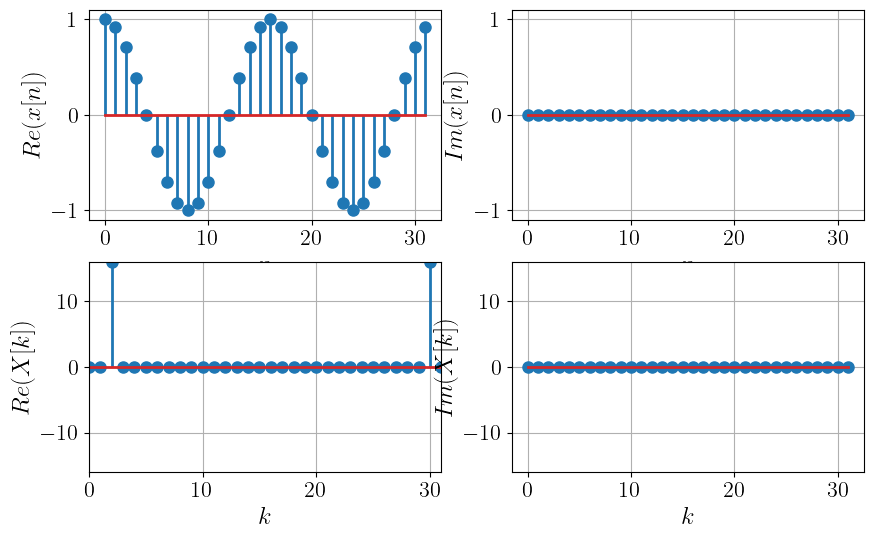

In [20]:
n = np.linspace(0,31,32)
xr = np.cos(n*np.pi/8)
xi = np.zeros(len(n))
X = np.fft.fft(xr)
ax1 = plt.subplot(221)
ax1.stem(n,xr)
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'$Re(x[n])$')
ax1.grid()
ax2 = plt.subplot(222, sharex = ax1, sharey=ax1)
ax2.stem(n,xi)
ax2.set_xlabel(r'$n$')
ax2.set_ylabel(r'$Im(x[n])$')
ax2.grid()
ax3 = plt.subplot(223)
ax3.stem(n,X.real)
ax3.set_xlabel(r'$k$')
ax3.set_ylabel(r'$Re(X[k])$')
ax3.axis([0,31,-16,16])
ax3.grid()
ax4 = plt.subplot(224, sharey = ax3)
ax4.stem(n,X.imag)
ax4.set_xlabel(r'$k$')
ax4.set_ylabel(r'$Im(X[k])$')
ax4.grid()
plt.show()

## Fast Fourier Transform (FFT)

Die direkte Implementierung der DFT erfordert $M^2$ Multiplikationen und $M^2 - M$ Additionen bei einer Signallänge von $M$ und ist daher sehr aufwendig.

Grundprinzip der FFT: *divide and conquer*
- Problem in zwei Teilprobleme der Größe $M/2$ aufspalten
- Teilprobleme weiter aufspalten bis Größe 1 erreicht ist

Vorteile:
- sehr effizient $M\log_2 M$ Operationen
- In zahlreichen Numerikpaketen vorhanden (python `np.fft.fft`)

Nachteil: 
- Standard-FFT auf Signalgröße $M=2^k$ ausgelegt (Abhilfe: mit Nullen auffüllen ...)

## Übungsaufgaben

### Eigenschaften der DFT

Betrachten Sie allgemein das DFT-Paar

\begin{equation}
x[n] \overset{\text{DFT}}{\leftrightarrow} X[k]
\end{equation}

Beschreiben Sie mit mathematischen Formeln die folgenden Eigenschaften der DFT:
1. Linearität
2. Zyklische Verschiebung
3. Modulation
4. Reziprozität
5. Konjugiert komplexe Folge
6. Zyklische Faltung
7. Multiplikation
8. Parsevalsche Gleichung

*Lösung an der Tafel*

### Grundlegende DFT-Paare

\begin{equation}
x[n] \overset{\text{DFT}}{\leftrightarrow} X[k]
\end{equation}

\begin{equation}
w_N = e^{-j\cdot 2\pi/N}
\end{equation}

Ermitteln Sie für die folgenden $x[n]$ die zugehörigen $X[k]$:
1. $x[n]=\delta[n]$ mit $0\leq n\leq N-1 \overset{\text{DFT}}{\leftrightarrow} \boxed{\text{     }}$ mit $0\leq k\leq N-1$
2. $x[n]=1$ mit $0\leq n\leq N-1 \overset{\text{DFT}}{\leftrightarrow} \boxed{\text{     }}$ mit $0\leq k\leq N-1$
3. $x[n]=w_N^{-n \cdot k_0}$ mit $0\leq n\leq N-1 \overset{\text{DFT}}{\leftrightarrow} \boxed{\text{     }}$ mit $0\leq k\leq N-1$
4. $x[n]=\cos(2\pi \cdot k_0 \cdot n/N)$ mit $0\leq n\leq N-1 \overset{\text{DFT}}{\leftrightarrow} \boxed{\text{     }}$ mit $0\leq k\leq N-1$
5. $x[n]=\cos\left(\frac{\pi}{8}\cdot n\right)$ mit $0\leq n\leq 31 \overset{\text{DFT}}{\leftrightarrow} \boxed{\text{     }}$ mit $0\leq k\leq N-1$

*Lösung an der Tafel*

### Orthogonalität

Von zentraler Bedeutung für die Eigenschaften der DFT ist die Orthogonalität der komplexen Exponentiellen.

\begin{equation}
\frac{1}{N}\cdot \sum_{n=0}^{N-1} e^{-j\frac{2\pi}{N}kn} = \frac{1}{N} \cdot \sum_{k=0}^{N-1} w_N^{k\cdot n} = \begin{Bmatrix} 1\text{ für } k=m\cdot N \\ 0\text{ sonst}\\ \end{Bmatrix}\text{ und }k,m\text{ ganze Zahlen}
\end{equation}

Verifizieren Sie die Gleichung mithilfe der geometrischen Reihe.

Geben Sie für die nachfolgenden Signale mit $n=0..N-1$ und $0\leq n_0 \leq N-1$ bzw. $0\leq \Omega_0\leq \pi$ jeweils das DFT-Spektrum der Länge $n$ an.

\begin{equation}
x_1[n] = \delta[n-n_0]
\end{equation}

\begin{equation}
x_2[n] = \cos(\Omega_0\cdot n)
\end{equation}

\begin{equation}
x_3[n] = \sin(\Omega_0 \cdot n)
\end{equation}

\begin{equation}
x_4[n] = e^{j\cdot \Omega_0 \cdot n}
\end{equation}

\begin{equation}
x_5[n] = 1
\end{equation}

Geben Sie für den Sonderfall mit $\Omega_0 = \lambda\cdot 2\pi /N$ mit $\lambda$ aus $\lbrace 1,2,...N-1\rbrace$ die Spektren $X_2[k]$, $X_3[k]$ und $X_4[k]$ an. Hinweis: beachten Sie die Orthogonalität.

\begin{equation}
x_2[n] = \cos\left(\frac{2\pi}{N}\cdot\lambda\cdot n\right)
\end{equation}

\begin{equation}
x_3[n] = \sin\left(\frac{2\pi}{N}\cdot\lambda\cdot n\right)
\end{equation}

\begin{equation}
x_4[n] = e^{j\cdot\frac{2\pi}{N}\cdot\lambda \cdot n}
\end{equation}

Vergleichen Sie die grafischen Darstellungen mit Ihren vorbereiteten Ergebnissen: a) $x_1[n]$ für $N=32$ und $n_0=4$, b) $x_2[n]$ bis $x_5[n]$ für $N=32$ und $\Omega_0=4\pi/N$, c) Signal $x_2[n]$ mit der geänderten normierten Kreisfrequenz $\Omega_0 = 4,5\pi/N$

Wenn $\Omega_0\neq\lambda\cdot 2\pi/N$ mit $\lambda$ aus $\lbrace 1,2,..,N-1\rbrace$ gewählt wird, verändern sich die DFT-Spektren in charakteristischer Weise. Erklären Sie die Veränderung im Spekturm. Warum verwendet man hier den Begriff Leckphänomen?

*Lösung an der Tafel*

Grafische Lösung $x_1[n]$ für $N=32$ und $n_0=4$

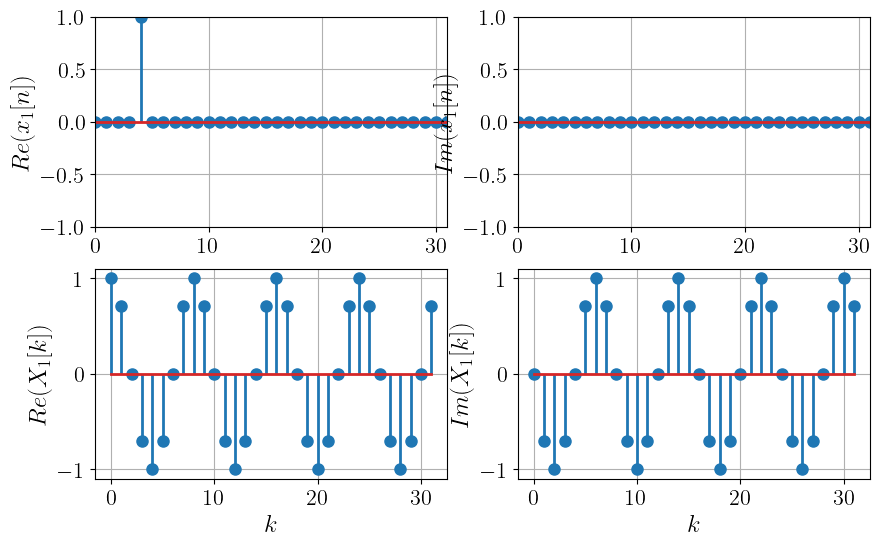

In [31]:
n = np.linspace(0,31,32)
xr = np.array([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
xi = np.zeros(len(xr))
X = np.fft.fft(xr)
ax1 = plt.subplot(221)
ax1.stem(n,xr)
ax1.axis([0,np.max(n),-1,1])
ax1.grid()
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'$Re(x_1[n])$')
ax2 = plt.subplot(222, sharex = ax1, sharey = ax1)
ax2.stem(n,xi)
ax2.grid()
ax2.set_xlabel(r'$n$')
ax2.set_ylabel(r'$Im(x_1[n])$')
ax3 = plt.subplot(223)
ax3.stem(n,X.real)
ax3.grid()
ax3.set_xlabel(r'$k$')
ax3.set_ylabel(r'$Re(X_1[k])$')
ax4 = plt.subplot(224)
ax4.stem(n,X.imag)
ax4.grid()
ax4.set_xlabel(r'$k$')
ax4.set_ylabel(r'$Im(X_1[k])$')
plt.show()

Grafische Lösung $x_2[n]$ für $N=32$

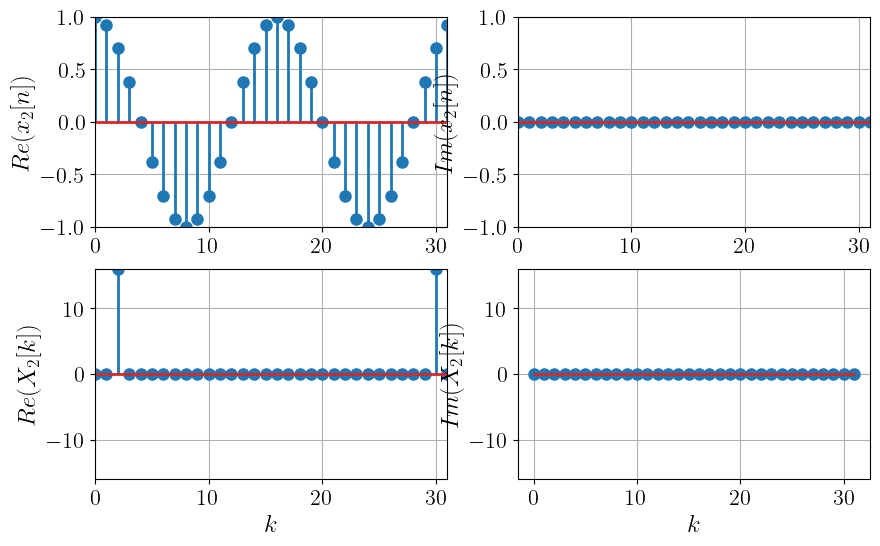

In [35]:
n = np.linspace(0,31,32)
xr = np.cos(n*4*np.pi/32)
xi = np.zeros(len(xr))
X = np.fft.fft(xr)
ax1 = plt.subplot(221)
ax1.stem(n,xr)
ax1.axis([0,np.max(n),-1,1])
ax1.grid()
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'$Re(x_2[n])$')
ax2 = plt.subplot(222, sharex = ax1, sharey = ax1)
ax2.stem(n,xi)
ax2.grid()
ax2.set_xlabel(r'$n$')
ax2.set_ylabel(r'$Im(x_2[n])$')
ax3 = plt.subplot(223)
ax3.stem(n,X.real)
ax3.axis([0,31,-16,16])
ax3.grid()
ax3.set_xlabel(r'$k$')
ax3.set_ylabel(r'$Re(X_2[k])$')
ax4 = plt.subplot(224, sharey = ax3)
ax4.stem(n,X.imag)
ax4.grid()
ax4.set_xlabel(r'$k$')
ax4.set_ylabel(r'$Im(X_2[k])$')
plt.show()

Grafische Lösung $x_3[n]$ für $N=32$

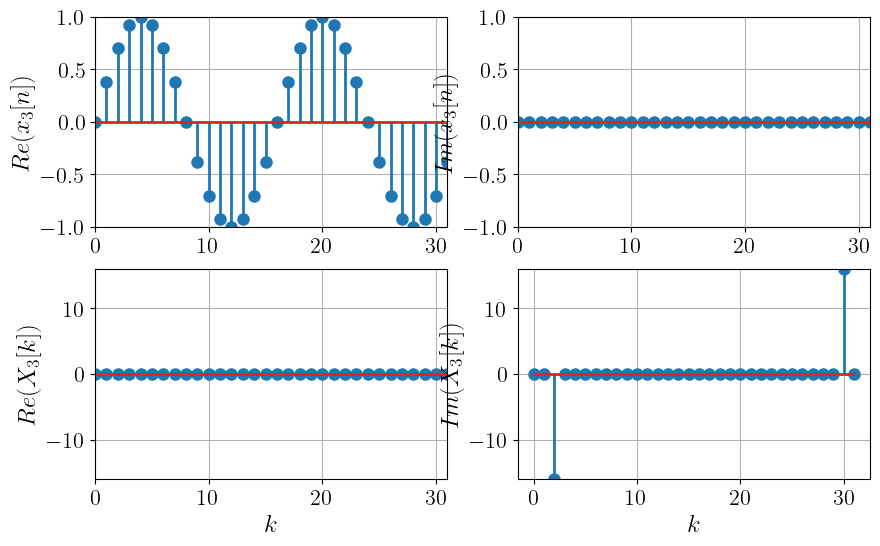

In [36]:
n = np.linspace(0,31,32)
xr = np.sin(n*4*np.pi/32)
xi = np.zeros(len(xr))
X = np.fft.fft(xr)
ax1 = plt.subplot(221)
ax1.stem(n,xr)
ax1.axis([0,np.max(n),-1,1])
ax1.grid()
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'$Re(x_3[n])$')
ax2 = plt.subplot(222, sharex = ax1, sharey = ax1)
ax2.stem(n,xi)
ax2.grid()
ax2.set_xlabel(r'$n$')
ax2.set_ylabel(r'$Im(x_3[n])$')
ax3 = plt.subplot(223)
ax3.stem(n,X.real)
ax3.axis([0,31,-16,16])
ax3.grid()
ax3.set_xlabel(r'$k$')
ax3.set_ylabel(r'$Re(X_3[k])$')
ax4 = plt.subplot(224, sharey = ax3)
ax4.stem(n,X.imag)
ax4.grid()
ax4.set_xlabel(r'$k$')
ax4.set_ylabel(r'$Im(X_3[k])$')
plt.show()

Grafische Lösung $x_4[n]$ für $N=32$

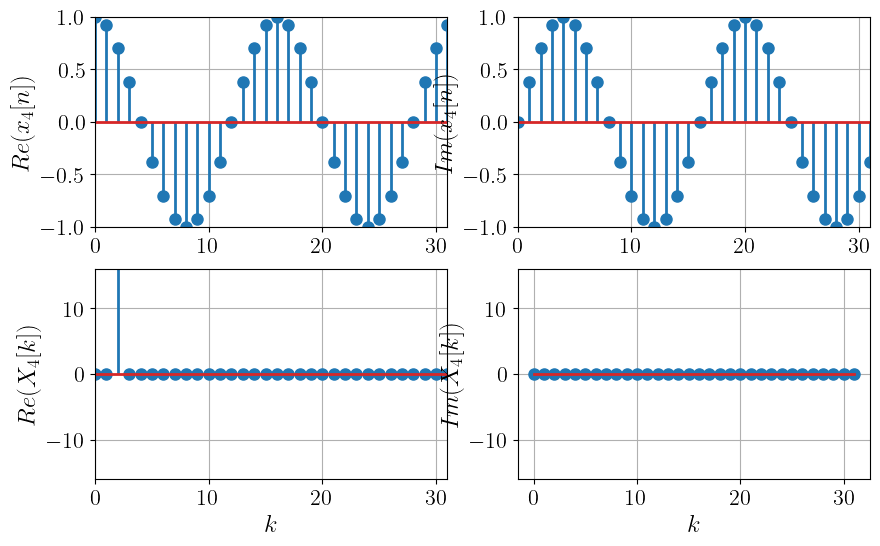

In [37]:
n = np.linspace(0,31,32)
xr = np.cos(n*4*np.pi/32)
xi = np.sin(n*4*np.pi/32)
X = np.fft.fft(xr+xi*1j)
ax1 = plt.subplot(221)
ax1.stem(n,xr)
ax1.axis([0,np.max(n),-1,1])
ax1.grid()
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'$Re(x_4[n])$')
ax2 = plt.subplot(222, sharex = ax1, sharey = ax1)
ax2.stem(n,xi)
ax2.grid()
ax2.set_xlabel(r'$n$')
ax2.set_ylabel(r'$Im(x_4[n])$')
ax3 = plt.subplot(223)
ax3.stem(n,X.real)
ax3.axis([0,31,-16,16])
ax3.grid()
ax3.set_xlabel(r'$k$')
ax3.set_ylabel(r'$Re(X_4[k])$')
ax4 = plt.subplot(224, sharey = ax3)
ax4.stem(n,X.imag)
ax4.grid()
ax4.set_xlabel(r'$k$')
ax4.set_ylabel(r'$Im(X_4[k])$')
plt.show()

Grafische Lösung $x_5[n]$ für $N=32$

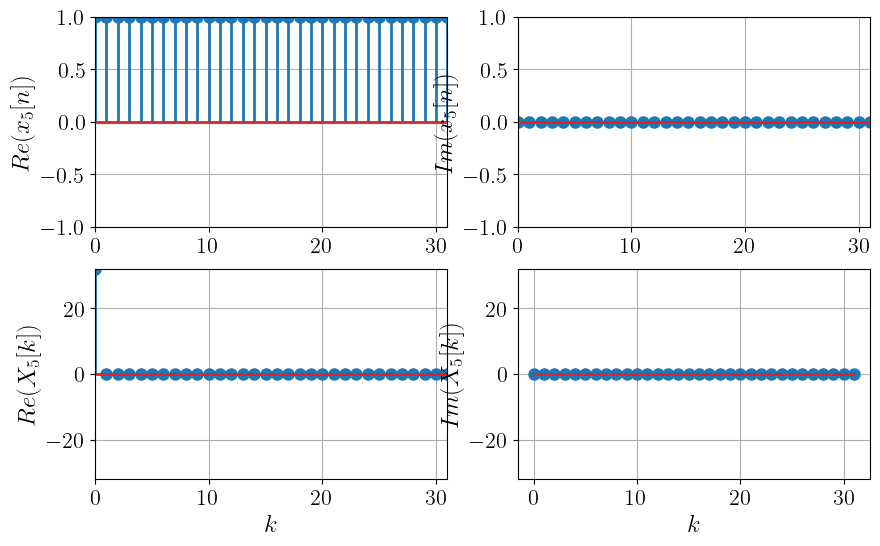

In [39]:
n = np.linspace(0,31,32)
xr = np.ones(len(n))
xi = np.zeros(len(n))
X = np.fft.fft(xr+xi*1j)
ax1 = plt.subplot(221)
ax1.stem(n,xr)
ax1.axis([0,np.max(n),-1,1])
ax1.grid()
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'$Re(x_5[n])$')
ax2 = plt.subplot(222, sharex = ax1, sharey = ax1)
ax2.stem(n,xi)
ax2.grid()
ax2.set_xlabel(r'$n$')
ax2.set_ylabel(r'$Im(x_5[n])$')
ax3 = plt.subplot(223)
ax3.stem(n,X.real)
ax3.axis([0,31,-32,32])
ax3.grid()
ax3.set_xlabel(r'$k$')
ax3.set_ylabel(r'$Re(X_5[k])$')
ax4 = plt.subplot(224, sharey = ax3)
ax4.stem(n,X.imag)
ax4.grid()
ax4.set_xlabel(r'$k$')
ax4.set_ylabel(r'$Im(X_5[k])$')
plt.show()

Grafische Lösung $x_2[n]$ für $N=32$ und $\Omega_0\neq \lambda \cdot 2\pi/N$

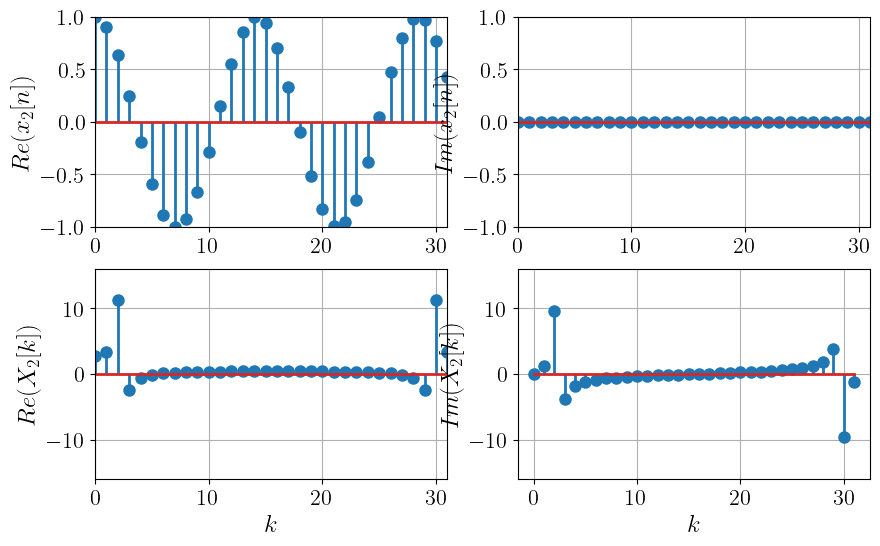

In [41]:
n = np.linspace(0,31,32)
xr = np.cos(n*4.5*np.pi/32)
xi = np.zeros(len(n))
X = np.fft.fft(xr+xi*1j)
ax1 = plt.subplot(221)
ax1.stem(n,xr)
ax1.axis([0,np.max(n),-1,1])
ax1.grid()
ax1.set_xlabel(r'$n$')
ax1.set_ylabel(r'$Re(x_2[n])$')
ax2 = plt.subplot(222, sharex = ax1, sharey = ax1)
ax2.stem(n,xi)
ax2.grid()
ax2.set_xlabel(r'$n$')
ax2.set_ylabel(r'$Im(x_2[n])$')
ax3 = plt.subplot(223)
ax3.stem(n,X.real)
ax3.axis([0,31,-16,16])
ax3.grid()
ax3.set_xlabel(r'$k$')
ax3.set_ylabel(r'$Re(X_2[k])$')
ax4 = plt.subplot(224, sharey = ax3)
ax4.stem(n,X.imag)
ax4.grid()
ax4.set_xlabel(r'$k$')
ax4.set_ylabel(r'$Im(X_2[k])$')
plt.show()

### DFT und IDFT

1. Skizzieren Sie das Signal $x[n] = 2\cdot\sin(\Omega n) - u[n+3]$ für $\Omega = \pi/6$ im Bereich $n=-6..6$.
2. Skizzieren Sie das DFT-Spektrum der Länge 16 des Signals $x[n]=\delta[n] + \sin(\Omega n)$ für $\Omega = \pi/4$. 
3. Berechnen Sie das zeitdiskrete Signal $x[n]$ für $N=16$ und $k_0 = 0..15$

\begin{equation}
X[k]=\frac{N}{2}\cdot j\cdot\left[-\delta[k-k_0] + \delta[k-(N-k_0)]\right]
\end{equation}

*Lösung an der Tafel*

```{bibliography}
:filter: docname in docnames
```